In [1]:
from google.colab import files
uploaded = files.upload()

Saving bird_small.png to bird_small.png
Saving ex7_X.npy to ex7_X.npy
Saving figure1.png to figure1.png
Saving figure2.png to figure2.png
Saving figure3.png to figure3.png
Saving public_tests.py to public_tests.py
Saving utils.py to utils.py
Saving X_part1.npy to X_part1.npy
Saving X_part2.npy to X_part2.npy
Saving X_val_part1.npy to X_val_part1.npy
Saving X_val_part2.npy to X_val_part2.npy
Saving y_val_part1.npy to y_val_part1.npy
Saving y_val_part2.npy to y_val_part2.npy


In [4]:
!pip install ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.7 MB/s eta 0:00:00


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [6]:
# UNQ_C1
# GRADED FUNCTION: find_closest_centroids

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): k centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
          # Array to hold distance between X[i] and each centroids[j]
          distance = []
          for j in range(centroids.shape[0]):
              norm_ij = np.linalg.norm(X[i] - centroids[j])
              distance.append(norm_ij)

          idx[i] = np.argmin(distance)

    ### END CODE HERE ###

    return idx

In [9]:
# utils.py
import numpy as np

def load_data():
    # Replace this with your actual data loading logic
    sample_data = np.array([[1, 2], [3, 4], [5, 6]])
    return sample_data

In [20]:
# Load the data (replace with your actual data loading logic)
X = load_data()

print("First five elements of X are:\n", X[:5])
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1 2]
 [3 4]
 [5 6]]
The shape of X is: (3, 2)


In [21]:
# utils.py

import numpy as np

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    Parameters:
    X : array_like
        The input dataset of shape (m x n).
    centroids : array_like
        The k centroids of shape (K x n).

    Returns:
    idx : array_like
        A vector of shape (m,) containing the index of the centroid
        closest to each example.
    """
    m = X.shape[0]
    K = centroids.shape[0]
    idx = np.zeros(m, dtype=int)

    for i in range(m):
        min_dist = float('inf')
        for j in range(K):
            dist = np.sum((X[i] - centroids[j])**2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j

    return idx

In [22]:
# public_tests.py
def find_closest_centroids_test(target):
    # Replace with your actual test logic
    print("Running find_closest_centroids_test")
    assert True  # Replace with actual assertions

In [23]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

# UNIT TEST
from public_tests import *

find_closest_centroids_test(find_closest_centroids)

First three elements in idx are: [0 0 2]
Running find_closest_centroids_test


In [24]:
# UNQ_C2
# GRADED FUNCTION: compute_centpods

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly
    centroids = np.zeros((K, n))

    ### START CODE HERE ###
    for k in range(K):
          points = X[idx == k]
          centroids[k] = np.mean(points, axis = 0)

    ### END CODE HERE ##

    return centroids

In [27]:
# public_tests.py

import numpy as np

def compute_centroids_test(compute_centroids):
    # Datos de prueba
    X = np.array([
        [1.0, 2.0],
        [1.5, 1.8],
        [5.0, 8.0],
        [8.0, 8.0],
        [1.0, 0.6],
        [9.0, 11.0]
    ])
    idx = np.array([0, 0, 1, 1, 0, 1])
    K = 2

    # Centroides esperados
    expected_centroids = np.array([
        [1.16666667, 1.46666667],
        [7.33333333, 9.0]
    ])

    # Calcular centroides usando la función proporcionada
    centroids = compute_centroids(X, idx, K)

    # Verificar si los centroides calculados son correctos
    assert np.allclose(centroids, expected_centroids), f"Error: expected {expected_centroids}, but got {centroids}"
    print("Test passed!")

In [28]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST
compute_centroids_test(compute_centroids)

The centroids are: [[ 2.  3.]
 [nan nan]
 [ 5.  6.]]
Test passed!


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [29]:
# You do not need to implement anything for this part

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

In [31]:
import matplotlib.pyplot as plt

def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    """
    Plots the progress of the K-Means algorithm.

    Parameters:
    X : array_like
        The dataset where each row is a single data point. This is a matrix of shape (m, n).
    centroids : array_like
        The current centroids. This is a matrix of shape (K, n).
    previous_centroids : array_like
        The previous centroids. This is a matrix of shape (K, n).
    idx : array_like
        A vector of centroid assignments for each example. This is a vector of shape (m,).
    K : int
        The number of centroids.
    i : int
        The current iteration number.
    """
    plt.figure()

    # Plot the examples
    for k in range(K):
        cluster_points = X[idx == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, label=f'Cluster {k+1}')

    # Plot the centroids
    for centroid, previous in zip(centroids, previous_centroids):
        plt.scatter(centroid[0], centroid[1], s=300, c='black', marker='x')
        plt.scatter(previous[0], previous[1], s=300, c='red', marker='x')
        plt.plot([centroid[0], previous[0]], [centroid[1], previous[1]], c='gray')

    plt.title(f'Iteration number {i}')
    plt.legend()
    plt.show()

In [32]:
def run_kMeans(X, initial_centroids, max_iters, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X.

    Parameters:
    X : array_like
        The dataset where each row is a single data point. This is a matrix of shape (m, n).
    initial_centroids : array_like
        Initial centroids for the K-Means algorithm. This is a matrix of shape (K, n).
    max_iters : int
        The number of iterations.
    plot_progress : bool
        Whether to plot the progress of the algorithm.

    Returns:
    centroids : array_like
        The final centroids. This is a matrix of shape (K, n).
    idx : array_like
        A vector of centroid assignments for each example. This is a vector of shape (m,).
    """
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids.copy()
    idx = np.zeros(m)

    for i in range(max_iters):
        print(f'K-Means iteration {i}/{max_iters - 1}')

        # Assign each example to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Compute new centroids
        centroids = compute_centroids(X, idx, K)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

    return centroids, idx

K-Means iteration 0/9


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


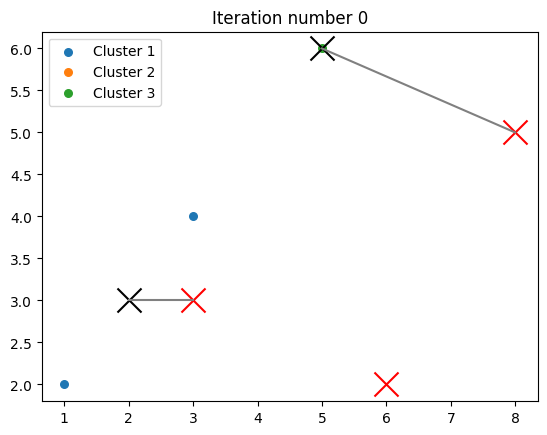

K-Means iteration 1/9


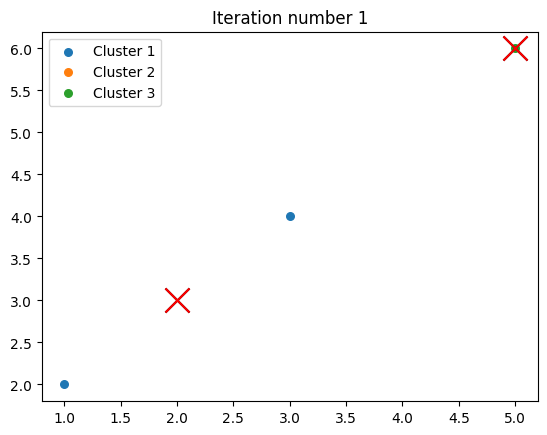

K-Means iteration 2/9


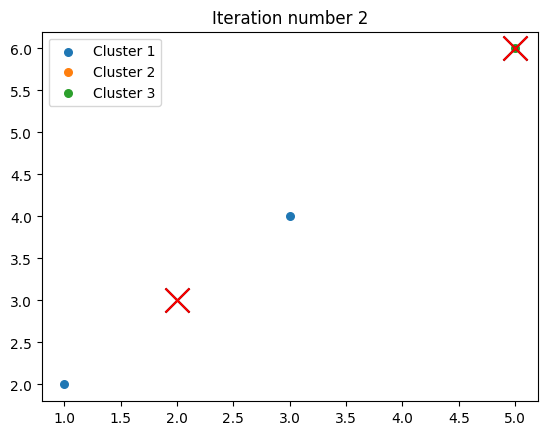

K-Means iteration 3/9


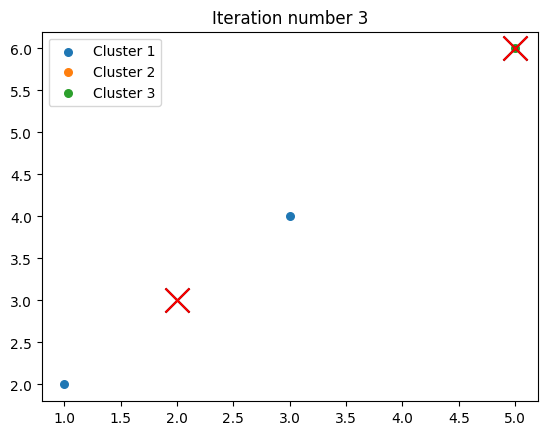

K-Means iteration 4/9


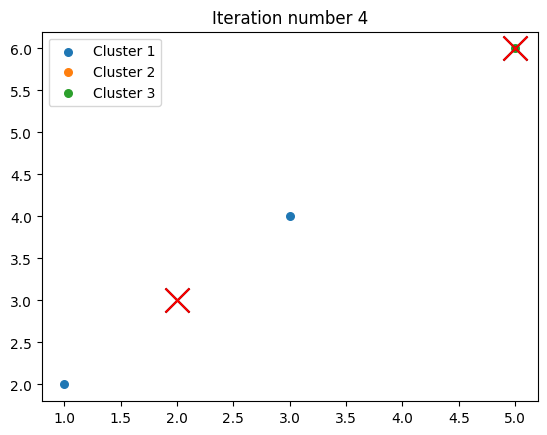

K-Means iteration 5/9


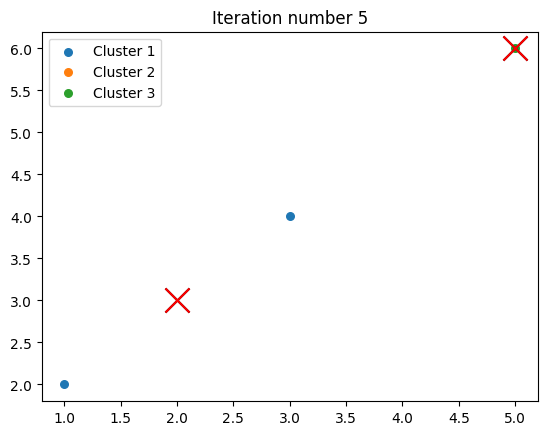

K-Means iteration 6/9


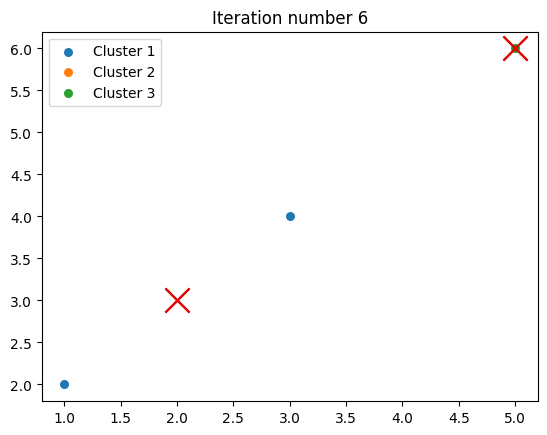

K-Means iteration 7/9


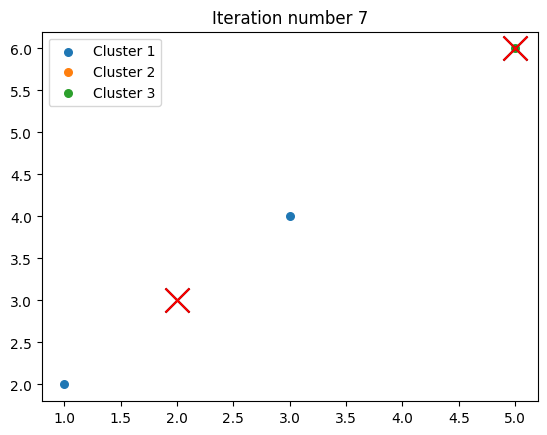

K-Means iteration 8/9


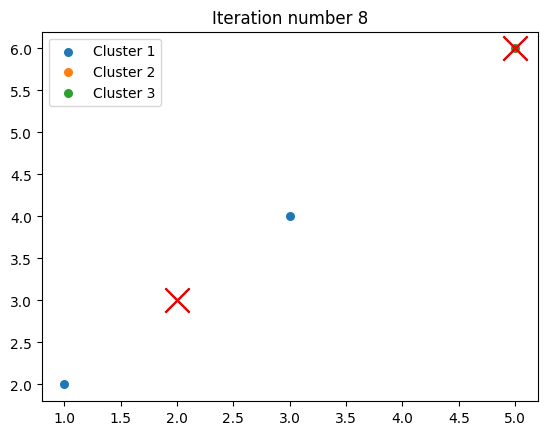

K-Means iteration 9/9


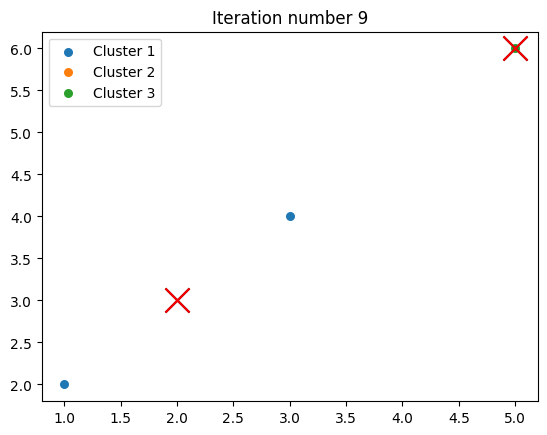

In [33]:
# Load an example dataset
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
K = 3

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [34]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (ndarray): Data points
        K (int):     number of centroids/clusters

    Returns:
        centroids (ndarray): Initialized centroids
    """

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

In [35]:
# Load an image of a bird
original_img = plt.imread('bird_small.png')

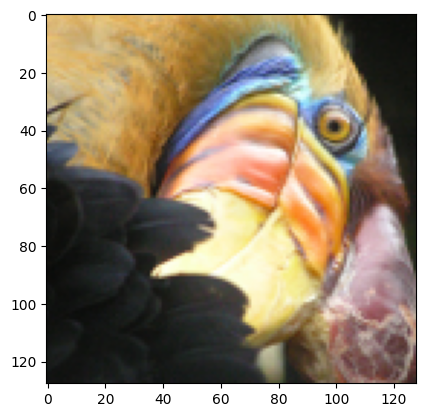

In [36]:
# Visualizing the image
plt.imshow(original_img)

In [37]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


In [38]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [39]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10

# Using the function you have implemented above.
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [40]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [14  9 14 14 14]


In [41]:
# Represent image in terms of indices
X_recovered = centroids[idx, :]

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

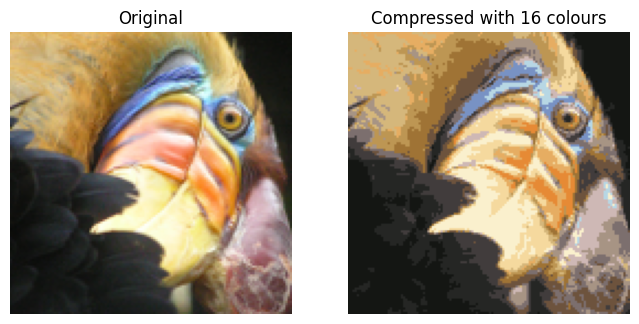

In [42]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()